In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
df = pd.DataFrame()
for day in range(1,5):
    try:
        df_tmp = pd.read_csv(f'https://data.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MOPITT/2019/MOP02J-201901{str(day).zfill(2)}-L2V18.0.3.csv', engine='python')
    except Exception:
        continue
    df = pd.concat([df, df_tmp])

In [3]:
df.head()

,# Latitude,Longitude,COTotalColumn,COMixingRatio surface,COMixingRatio 900hPa,COMixingRatio 800hPa,COMixingRatio 700hPa,COMixingRatio 600hPa,COMixingRatio 500hPa,COMixingRatio 400hPa,COMixingRatio 300hPa,COMixingRatio 200hPa,COMixingRatio 100hPa,RetrievedSurfaceTemperature
0,-70.3974,123.458,4.664340e+17,42.5651,NaN,NaN,42.382,37.4212,33.2192,31.7189,32.0422,21.4270,14.8771,241.804
1,-71.2577,123.461,4.292510e+17,32.4784,NaN,NaN,NaN,30.1969,32.2419,35.2442,35.4249,21.4356,14.4509,232.572
2,-70.8910,124.231,3.849500e+17,30.8472,NaN,NaN,NaN,27.3463,27.2448,28.4969,30.0288,20.4061,14.5132,233.564
3,-71.5359,124.620,4.707770e+17,53.9822,NaN,NaN,NaN,45.2232,31.0651,27.2863,31.2066,25.4214,16.9910,236.716
4,-71.3551,124.994,3.545500e+17,37.4285,NaN,NaN,NaN,30.7856,24.6331,21.9155,22.6195,17.8905,14.3262,236.495


In [4]:
geometry = [Point(xy) for xy in zip(df[' Longitude'], df['# Latitude'])]
gdf = GeoDataFrame(df[' COTotalColumn'], geometry=geometry)
gdf.head()

,COTotalColumn,geometry
0,4.664340e+17,POINT (123.45800 -70.39740)
1,4.292510e+17,POINT (123.46100 -71.25770)
2,3.849500e+17,POINT (124.23100 -70.89100)
3,4.707770e+17,POINT (124.62000 -71.53590)
4,3.545500e+17,POINT (124.99400 -71.35510)


In [5]:
d = gdf[' COTotalColumn'].values
t = d.mean() + (5 * d.std())
gdf_2 = gdf[gdf[' COTotalColumn'] < t]

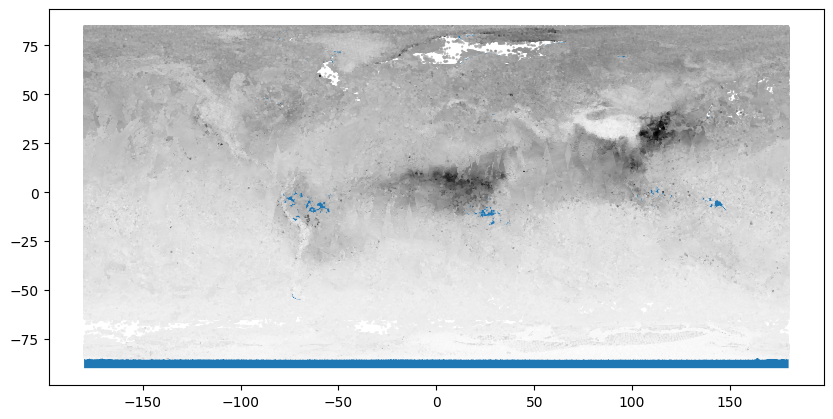

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_2.plot(ax=world.plot(figsize=(10, 6)), column=' COTotalColumn', markersize=0.2, cmap='Greys');